In [12]:
%matplotlib inline
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree
import sklearn.metrics
from sklearn import tree
from io import StringIO
from IPython.display import Image
import pydotplus

In [13]:
data = pd.read_csv('loadpekerjaan.csv')

In [14]:
print(data.shape)
data.head(10)

(30, 5)


,load,man_power,durasi,kondisi_tim,class
0,1,7,2,1,1
1,2,11,3,1,2
2,2,8,6,2,3
3,2,8,2,2,2
4,2,8,6,2,3
5,2,13,4,1,1
6,2,9,2,2,3
7,2,13,5,2,2
8,2,11,2,2,3
9,2,10,6,2,1


In [15]:
data.describe()

,load,man_power,durasi,kondisi_tim,class
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,1.833333,9.900000,3.300000,1.566667,2.133333
std,0.379049,2.090207,1.725069,0.504007,0.860366
min,1.000000,7.000000,1.000000,1.000000,1.000000
25%,2.000000,8.000000,2.000000,1.000000,1.000000
50%,2.000000,10.000000,2.500000,2.000000,2.000000
75%,2.000000,11.750000,5.000000,2.000000,3.000000
max,2.000000,13.000000,6.000000,2.000000,3.000000


In [16]:
data.isnull().sum()

load           0
man_power      0
durasi         0
kondisi_tim    0
class          0
dtype: int64

In [17]:
data_clean = data.dropna()
data_clean.describe()

,load,man_power,durasi,kondisi_tim,class
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,1.833333,9.900000,3.300000,1.566667,2.133333
std,0.379049,2.090207,1.725069,0.504007,0.860366
min,1.000000,7.000000,1.000000,1.000000,1.000000
25%,2.000000,8.000000,2.000000,1.000000,1.000000
50%,2.000000,10.000000,2.500000,2.000000,2.000000
75%,2.000000,11.750000,5.000000,2.000000,3.000000
max,2.000000,13.000000,6.000000,2.000000,3.000000


In [18]:
data_clean.isnull().sum()

load           0
man_power      0
durasi         0
kondisi_tim    0
class          0
dtype: int64

In [19]:
num_of_numerical_cols = data_clean._get_numeric_data().columns.shape[0]
print(num_of_numerical_cols, 'numerical columns')
name_of_numerical_cols = data_clean._get_numeric_data().columns
print(name_of_numerical_cols)

5 numerical columns
Index(['load', 'man_power', 'durasi', 'kondisi_tim', 'class'], dtype='object')


In [20]:
data_clean[['class', 'load', 'man_power','durasi','kondisi_tim']].sample(10)

,class,load,man_power,durasi,kondisi_tim
26,3,2,8,5,2
2,3,2,8,6,2
9,1,2,10,6,2
5,1,2,13,4,1
27,3,2,10,2,1
10,3,2,9,4,2
8,3,2,11,2,2
3,2,2,8,2,2
11,2,2,12,2,1
18,2,2,12,2,1


In [24]:
predictors = data_clean[['load', 'man_power','durasi','kondisi_tim']]
targets = data_clean['class']
X_train, X_test, y_train, y_test = train_test_split(predictors, targets, test_size=.2, random_state = 0)
print('X_train = ',X_train.shape)
print('X_test = ',X_test.shape)
print('y_train = ',y_train.shape)
print('y_test = ',y_test.shape)

X_train =  (24, 4)
X_test =  (6, 4)
y_train =  (24,)
y_test =  (6,)


In [25]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)
predictions = classifier.predict(X_test)
confusion_array = sklearn.metrics.confusion_matrix(y_test,predictions)
print(confusion_array)

[[1 1 0]
 [0 0 0]
 [0 3 1]]


In [26]:
print('TN = ', confusion_array[0,0] ) #true negative
print('FN = ', confusion_array[0,1] ) #false negative
print('TP = ', confusion_array[1,1] ) #true positif
print('FN = ', confusion_array[1,0] ) #false positif

TN =  1
FN =  1
TP =  0
FN =  0


In [27]:
sklearn.metrics.accuracy_score(y_test,predictions)

0.3333333333333333

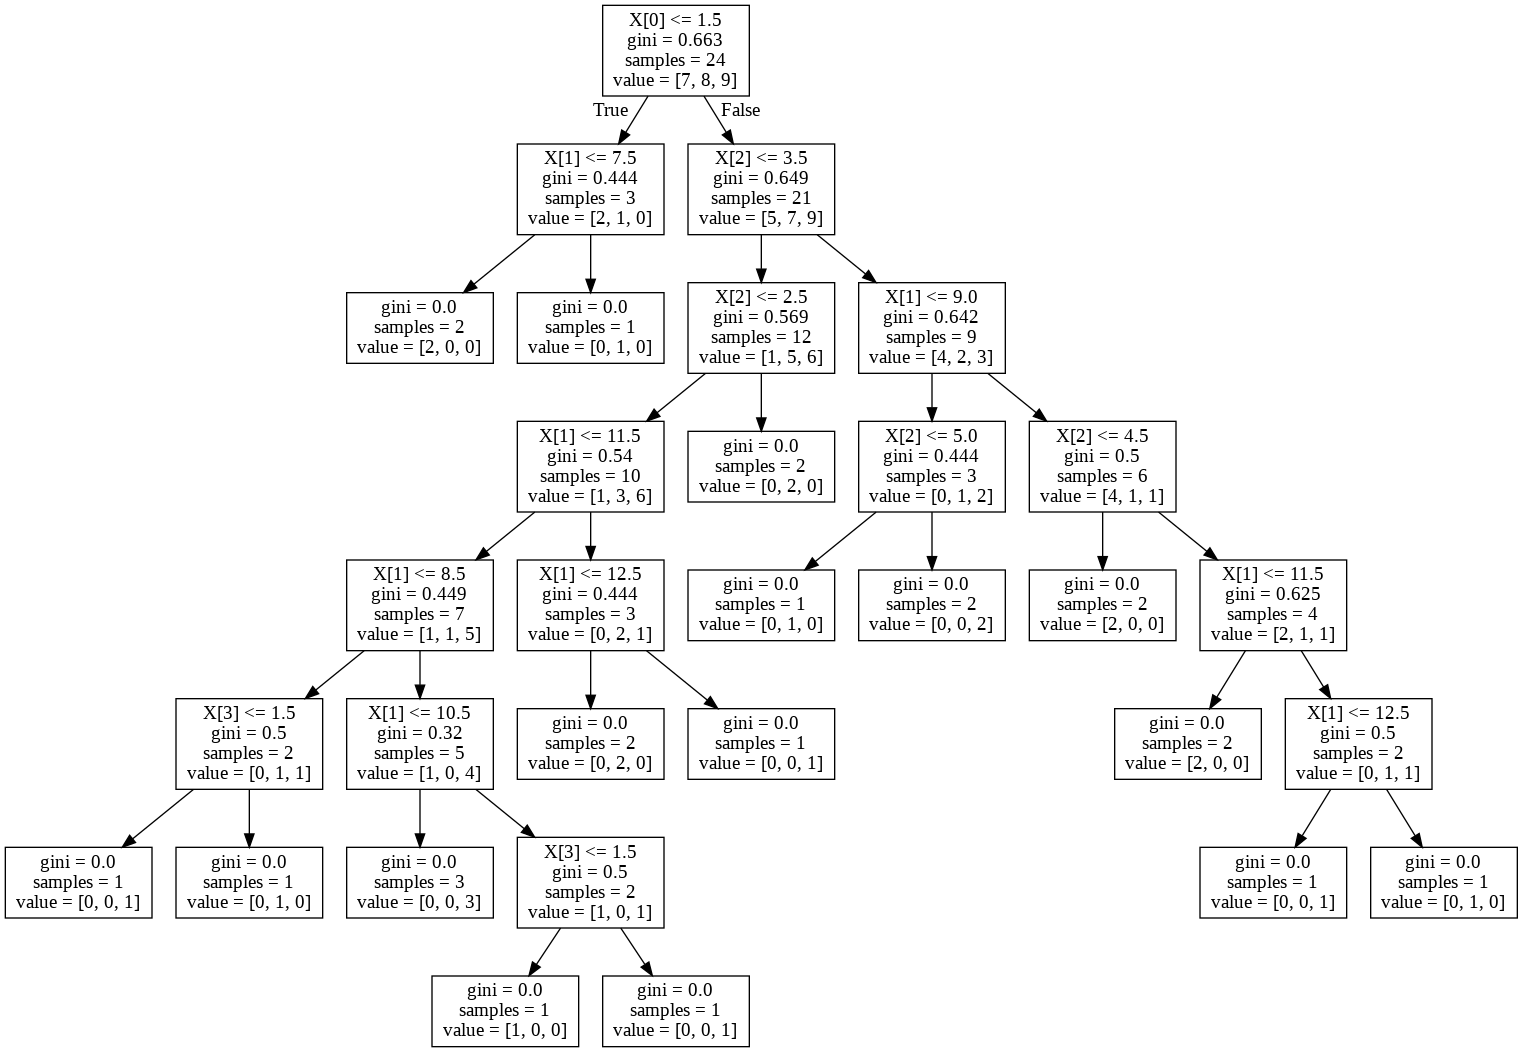

In [28]:
import os
os.environ["PATH"] += os.pathsep

out = StringIO()
tree.export_graphviz(classifier,out_file=out)
import pydotplus
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())